In [8]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [9]:
# Import the packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import datetime as dt

### Checkpoint 1: Data Cleaning 
#### Checkpoint 1.1: Import and read the uber request data. Store it in a variable called Uber_Request.

In [10]:
Uber_Request = pd.read_csv("Uber Request Data.csv", encoding="utf-8")
Uber_Request.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


#### Checkpoint 1.2: Formating Request timestamp and Drop timestamp into one generic timestamp format

In [7]:
# Formating Request timestamp and Drop timestamp into one generic timestamp format

Uber_Request['Request timestamp'] = pd.to_datetime(Uber_Request['Request timestamp'])
Uber_Request['Drop timestamp'] = pd.to_datetime(Uber_Request['Drop timestamp'])
Uber_Request.info()

Uber_Request.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


#### Checkpoint 1.3 Spliting the timestamp column to different derived columns

In [278]:
#Spliting the Request timestamp column into Request date and Request time column

Uber_Request['Request date'] = Uber_Request['Request timestamp'].dt.date
Uber_Request['Request time'] = Uber_Request['Request timestamp'].dt.time

#Spliting the  Drop timestamp column into Drop date and Drop time column

Uber_Request['Drop date'] = Uber_Request['Drop timestamp'].dt.date
Uber_Request['Drop time'] = Uber_Request['Drop timestamp'].dt.time

#Spliting the  Request time column into Request hours column

Uber_Request['Request hours'] = Uber_Request['Request timestamp'].dt.hour

#Spliting the  Drop time column into Drop hours column

Uber_Request['Drop hours'] = Uber_Request['Drop timestamp'].dt.hour

Uber_Request.head()



,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request date,Request time,Drop date,Drop time,Request hours,Drop hours
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11:51:00,2016-11-07,13:00:00,11,13.0
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17:57:00,2016-11-07,18:47:00,17,18.0
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,09:17:00,2016-12-07,09:58:00,9,9.0
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21:08:00,2016-12-07,22:03:00,21,22.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,2016-07-13,09:25:47,8,9.0


### Checkpoint 2: Visually identify the most pressing problems for Uber

#### Checkpoint 2.1: To Identify the different status of the Trip from City to Airport and Airport to City

In [279]:
#Count of Trip Status as Completed

print("Count of Trip Status as Completed:")
print(Uber_Request.Status[Uber_Request["Status"]=="Trip Completed"].count())

#Count of Trip Cancelled

print("Count of Trip Status as Cancelled:")
print(Uber_Request.Status[Uber_Request["Status"]=="Cancelled"].count())

#Count of Trip Status as No Car Available

print("Count of Trip Status as No Cars Available:")
print(Uber_Request.Status[Uber_Request["Status"]=="No Cars Available"].count())


Count of Trip Status as Completed:
2831
Count of Trip Status as Cancelled:
1264
Count of Trip Status as No Cars Available:
2650


#### Checkpoint 2.2: Plot to show the different status of the Trip from City to Airport and Airport to City

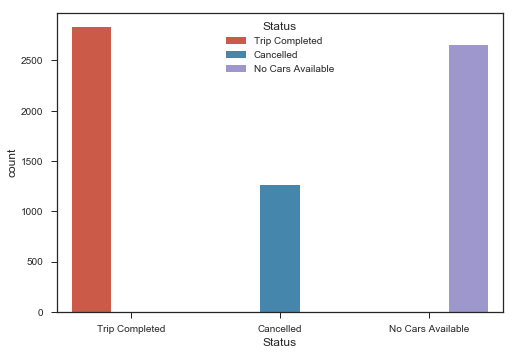

In [280]:
sns.set_style('ticks')
sns.countplot(Uber_Request['Status'], hue=Uber_Request['Status'])
plt.show()


Throughout our assignment we have used the matplotlib and seaborn libraries to plot the graph.
We have mainly focused on <b> categorical data </b>, hence we have used countplot function to plot the graphs.

The Above plot shows the count of different status of the Trip from `City to Airport` and `Airport to City`.

We can see that count of `Trip completed` is 2831, count of `Trip Cancelled` is 1264 and count of `No Cars Available` is 2650.

#### Checkpoint 2.3: Frequency of requests that get 'cancelled' or show 'no cars available'

In [281]:
#Creating new dataframe taking status as Cancelled or No Cars Available

Uber_Request_Problem = Uber_Request.loc[(Uber_Request['Status'] == 'Cancelled') | (Uber_Request['Status'] == 'No Cars Available')]
Uber_Request_Problem.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request date,Request time,Drop date,Drop time,Request hours,Drop hours
2831,2905,City,1.0,Cancelled,2016-07-13 06:08:41,NaT,2016-07-13,06:08:41,NaN,NaN,6,NaN
2832,4805,City,1.0,Cancelled,2016-07-14 17:07:58,NaT,2016-07-14,17:07:58,NaN,NaN,17,NaN
2833,5202,Airport,1.0,Cancelled,2016-07-14 20:51:37,NaT,2016-07-14,20:51:37,NaN,NaN,20,NaN
2834,5927,City,1.0,Cancelled,2016-07-15 10:12:40,NaT,2016-07-15,10:12:40,NaN,NaN,10,NaN
2835,2347,Airport,2.0,Cancelled,2016-12-07 19:14:00,NaT,2016-12-07,19:14:00,NaN,NaN,19,NaN


In [282]:
#Count of frequency of requests that get cancelled from City to Aiport

print("Count of frequency of requests that get 'Cancelled' from City-to-Aiport:")
print(Uber_Request_Problem.Status[(Uber_Request_Problem['Status']== 'Cancelled') &(Uber_Request_Problem['Pickup point']=='City')].count())

#Count of frequency of request that get cancelled from Airport to City

print("Count of frequency of requests that get 'Cancelled' from Airport-to-City:")
print(Uber_Request_Problem.Status[(Uber_Request_Problem['Status']== 'Cancelled') &(Uber_Request_Problem['Pickup point']=='Airport')].count())

#Count of frequency of requests that show no cars available from City to Aiport

print("Count of frequency of requests that show 'No Cars Available' from City-to-Aiport:")
print(Uber_Request_Problem.Status[(Uber_Request_Problem['Status']== 'No Cars Available') &(Uber_Request_Problem['Pickup point']=='City')].count())

#Count of frequency of requests that show no cars available from Airport to City

print("Count of frequency of requests that show 'No Cars Available' from Airport-to-City:")
print(Uber_Request_Problem.Status[(Uber_Request_Problem['Status']== 'No Cars Available') &(Uber_Request_Problem['Pickup point']=='Airport')].count())



Count of frequency of requests that get 'Cancelled' from City-to-Aiport:
1066
Count of frequency of requests that get 'Cancelled' from Airport-to-City:
198
Count of frequency of requests that show 'No Cars Available' from City-to-Aiport:
937
Count of frequency of requests that show 'No Cars Available' from Airport-to-City:
1713


#### Checkpoint 2.4: Plot to show the frequency of requests that get 'cancelled' or show 'no cars available' from 'City to Airport' & 'Airport to City'

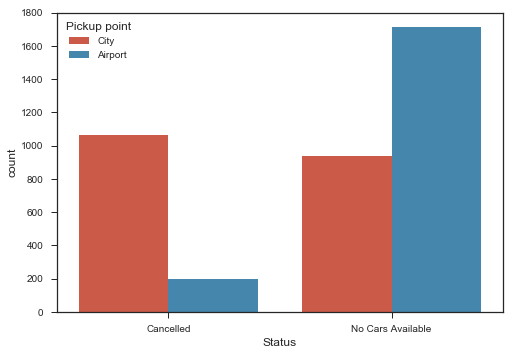

In [283]:
sns.countplot(Uber_Request_Problem['Status'], hue=Uber_Request_Problem['Pickup point'])
plt.show()

So, the above plot shows that Count of frequency of requests that get 'Cancelled' from City-to-Airport and Airport-to-City is 1066 and 198 respectively. So, we can say that cancellation is more from City to Aiport.

The plot too shows the Count of frequency of requests that show 'No Cars Available' from City-to-Airport and Airport-to-City is 937 and 1713 respectively. So, we can say that availability of cars is less in Airport as compare to City.

So, total no of request that get 'Cancelled' or show 'No Cars Available' from City-to-Airport is 2003 as compared to 1911 from Airport-to-City.

So, the most problematic request is 'Cancelled' or show 'No Cars Available' from City-to-Airport.

#### Checkpoint 2.5: Frequency of requests based on different time slots

In [284]:
#Generating a new column Time_slots based on the request hours

Uber_Request['Time slots'] = pd.cut(Uber_Request['Request hours'],[0,4,8,12,16,20,24], labels = ["Late Night","Early Morning","Morning","After Noon","Evening","Night"],right=False)
Uber_Request.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request date,Request time,Drop date,Drop time,Request hours,Drop hours,Time slots
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11:51:00,2016-11-07,13:00:00,11,13.0,Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17:57:00,2016-11-07,18:47:00,17,18.0,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,09:17:00,2016-12-07,09:58:00,9,9.0,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21:08:00,2016-12-07,22:03:00,21,22.0,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,2016-07-13,09:25:47,8,9.0,Morning


In [285]:
#Creating a dataframe Uber_City_to_Airport considering the request from City-to-Airport
Uber_City_to_Airport = Uber_Request[Uber_Request['Pickup point']=='City']

#Creating a dataframe Uber_City_to_Airport considering the request from Airport-to-City
Uber_Airport_to_City = Uber_Request[Uber_Request['Pickup point']=='Airport']


#### Checkpoint 2.6: Plot to show the frequency of requests from City-to-Airport and Airport-to-City in two different plots within different Time slots


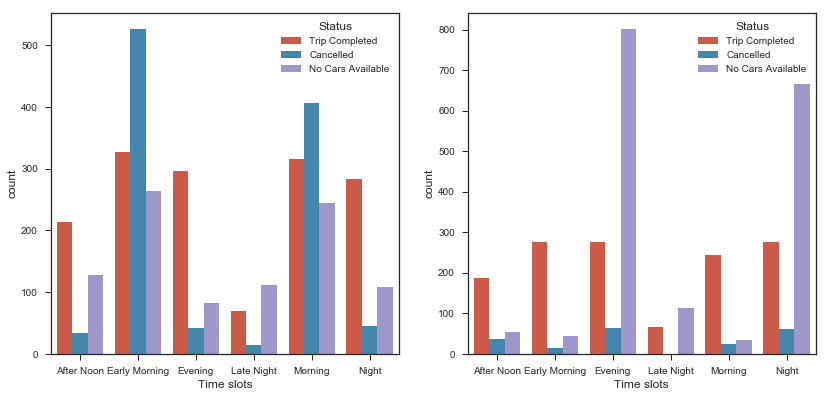

In [286]:
fig, ax =plt.subplots(1,2)
fig.set_size_inches(13.7, 6.27)
sns.countplot(Uber_City_to_Airport['Time slots'], hue=Uber_City_to_Airport['Status'], ax=ax[0])
sns.countplot(Uber_Airport_to_City['Time slots'], hue=Uber_Airport_to_City['Status'], ax=ax[1])
plt.show()

The plots show that the frequency of request based on different time slots from City-to-Airport and Airport-to-City in plot1 and plot2 respectively.

### Checkpoint 3: Find out the gap between supply and demand 

#### Checkpoint 3.1 : the time slots when the highest gap exists

In [287]:
#Total no of demands requested

print("Total no of demands requested from City-to-Airport:")
print(Uber_City_to_Airport.Status.count())

print("Total no of demands requested from Airport-to-City:")
print(Uber_Airport_to_City.Status.count())

Total no of demands requested from City-to-Airport:
3507
Total no of demands requested from Airport-to-City:
3238


In [288]:
# Creating a new column as Supply in dataframe Uber_City_to_Airport 
Uber_City_to_Airport['Supply'] = Uber_City_to_Airport.Status.loc[Uber_City_to_Airport['Status']=='Trip Completed']

# Creating a new column as Supply in dataframe Uber_Airport_to_City
Uber_City_to_Airport['Supply'] = Uber_Airport_to_City.Status.loc[Uber_Airport_to_City['Status']=='Trip Completed']

#Total no of supply or trip completed

print("Total no of supply or trip completed from City-to-Airport:")
print(Uber_City_to_Airport.Status[Uber_City_to_Airport['Status']=='Trip Completed'].count())

print("Total no of supply or trip completed from City-to-Airport:")
print(Uber_Airport_to_City.Status[Uber_Airport_to_City['Status']=='Trip Completed'].count())

Total no of supply or trip completed from City-to-Airport:
1504
Total no of supply or trip completed from City-to-Airport:
1327


In [289]:
#Creating a new column as Gap in dataframe Uber_City_to_Airport
Uber_City_to_Airport['Gap'] = Uber_City_to_Airport.Status.loc[(Uber_City_to_Airport['Status']=='Cancelled') | (Uber_City_to_Airport['Status']=='No Cars Available')]

#Creating a new column as Gap in dataframe Uber_Airport_to_City
Uber_Airport_to_City['Gap'] = Uber_Airport_to_City.Status.loc[(Uber_Airport_to_City['Status']=='Cancelled') | (Uber_Airport_to_City['Status']=='No Cars Available')]

#Total no of gap betwen supply and demand

print("Total no of gap betwen supply and demand from City-to-Airport:")
print(Uber_City_to_Airport.Status[(Uber_City_to_Airport['Status']=='Cancelled') | (Uber_City_to_Airport['Status']=='No Cars Available')].count())

print("Total no of gap betwen supply and demand from Airport-to-City:")
print(Uber_Airport_to_City.Status[(Uber_Airport_to_City['Status']=='Cancelled') | (Uber_Airport_to_City['Status']=='No Cars Available')].count())


Total no of gap betwen supply and demand from City-to-Airport:
2003
Total no of gap betwen supply and demand from Airport-to-City:
1911


#### Checkpoint 3.2: Plot to show the gap between supply and demand

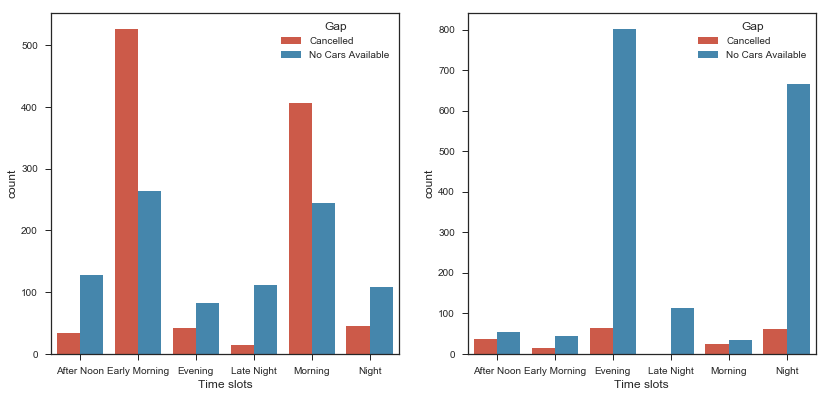

In [290]:
fig, ax =plt.subplots(1,2)
fig.set_size_inches(13.7, 6.27)
sns.countplot(Uber_City_to_Airport['Time slots'], hue=Uber_City_to_Airport['Gap'], ax=ax[0])
sns.countplot(Uber_Airport_to_City['Time slots'], hue=Uber_Airport_to_City['Gap'], ax=ax[1])
plt.show()

The first plot shows the Gap between City-to-Airport and second plot shows the Gap between Airport-to-City.

So, from the first plot we can say that the time slot where highest gap exist from <b>City-to-Airport</b> is <b>'Early Morning'</b>. The type of request from City-to-Airport for which the gap is the most severe in the <b>'Early Morning'</b> time slot is <b> 'Cancelled'</b>.

And from the second plot we can say that the time slot where highest gap exist from <b>Airport-to-City</b> is <b>'Evening'</b>.
The type of request from Airport-to-City for which the gap is the most severe in the <b>'Evening'</b> time slot is <b> 'No Cars Available'</b>.